In [1]:
import tensorflow as tf
from tensorflow import keras
import import_ipynb
from dataloader import get_X_df, get_y_df, data_prep, NORMALIZER
from model_arch import build_model
from hyperparameters import EPOCHS, LEARNING_RATE, BATCH_SIZE
from matplotlib import pyplot as plt

2023-07-18 17:41:19.208884: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


importing Jupyter notebook from dataloader.ipynb
Tensorflow version: 2.12.0
importing Jupyter notebook from model_arch.ipynb
Tensorflow version: 2.12.0
importing Jupyter notebook from hyperparameters.ipynb
Tensorflow version: 2.12.0


In [2]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.12.0


In [3]:
data_filepath = "../../../data/csv/plant_data.csv"

In [4]:
X = get_X_df(data_filepath)
y = get_y_df(data_filepath, "LFW_g")
X_train, X_test, y_train, y_test = data_prep(X, y)

In [5]:
NORMALIZER.adapt(X_train)

In [6]:
model = build_model(NORMALIZER)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18,460
Trainable params: 18,433
Non-trainable params: 27
_________________________________________________________________


In [8]:
history = model.fit (
    X_train, y_train,
    epochs = EPOCHS,
    validation_split = 0.1
)

Epoch 1/250
5/5 [==============================] - 1s 61ms/step - loss: 6162.2559 - val_loss: 11503.3076
Epoch 2/250
5/5 [==============================] - 0s 14ms/step - loss: 6045.3350 - val_loss: 11307.0400
Epoch 3/250
5/5 [==============================] - 0s 11ms/step - loss: 5912.6890 - val_loss: 11081.0166
Epoch 4/250
5/5 [==============================] - 0s 23ms/step - loss: 5765.5776 - val_loss: 10797.7588
Epoch 5/250
5/5 [==============================] - 0s 14ms/step - loss: 5587.8008 - val_loss: 10413.7832
Epoch 6/250
5/5 [==============================] - 0s 12ms/step - loss: 5327.5254 - val_loss: 9916.2188
Epoch 7/250
5/5 [==============================] - 0s 11ms/step - loss: 5015.3247 - val_loss: 9283.9336
Epoch 8/250
5/5 [==============================] - 0s 11ms/step - loss: 4604.5308 - val_loss: 8509.2041
Epoch 9/250
5/5 [==============================] - 0s 11ms/step - loss: 4119.1021 - val_loss: 7593.7959
Epoch 10/250
5/5 [==============================] - 0s 11ms

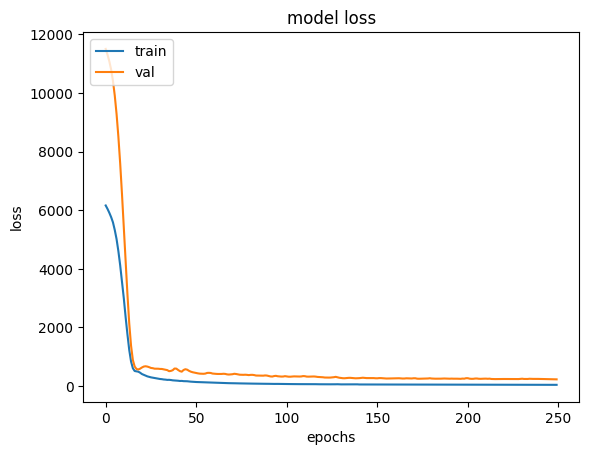

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 32ms/step - loss: 22.5134


22.51338005065918